Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Càrrega i pre-processament de les dades

In [3]:
datafile = "data/healthcare-dataset-stroke-data.csv"

df = pd.read_csv(datafile)

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df["Residence_type"] = df["Residence_type"].map({'Urban': 1, 'Rural': 0})
df['stroke'] = df['stroke'].astype('category').cat.codes


df = df.dropna()

df = pd.get_dummies(df, columns=['smoking_status', "work_type", "Residence_type", "ever_married"])

# crear variable binaria per obesitat/normal
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creació i test de la regressió logística

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9460285132382892


## Visualització dels factors més importants pel model

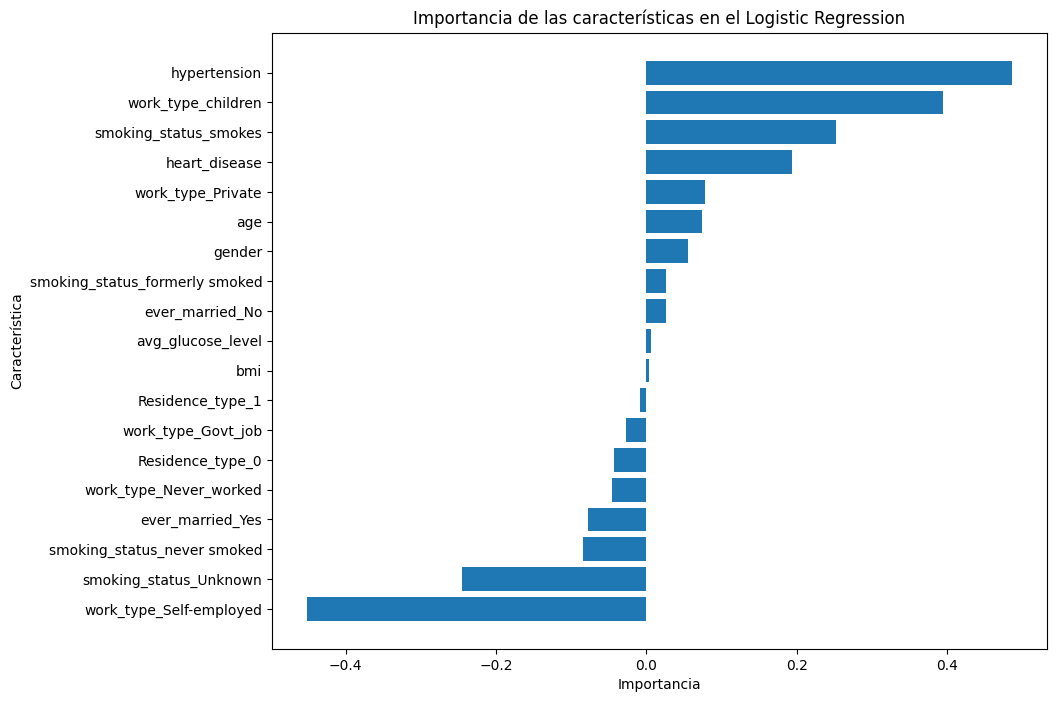

In [5]:
feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

## Eliminació d'alguns factors

Prova per a evaluar si es poden generar prediccions sense dades mèdiques, més accessibles per a la població general.

Accuracy: 0.9460285132382892


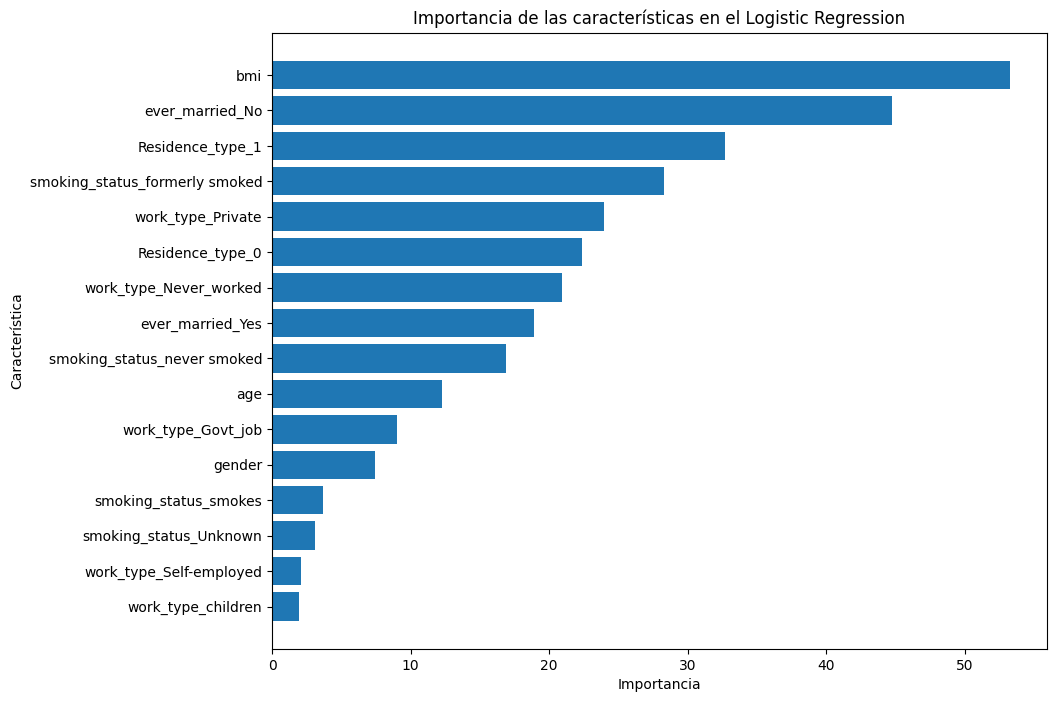

In [ ]:
X = df.drop(columns=['id', 'stroke', "hypertension", "heart_disease", "avg_glucose_level"])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

feature_importances = clf.coef_[0]

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Logistic Regression')
plt.gca().invert_yaxis()
plt.show()